In [119]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [120]:
data =pd.read_csv('fake_customer_data_with_errors.csv')
data.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,NaN,NaN
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0,NaN,Female
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0,NaN,male
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0,NaN,F
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,NaN,M


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2150 non-null   object 
 1   Name             2150 non-null   object 
 2   Age              1630 non-null   float64
 3   Gender           1877 non-null   object 
 4   Email            2150 non-null   object 
 5   Phone            1072 non-null   float64
 6   PurchaseAmount   2049 non-null   float64
 7   PurchaseDate     2150 non-null   object 
 8   ProductCategory  1573 non-null   object 
 9   Rating           1821 non-null   float64
 10  Unnamed          0 non-null      float64
 11    Gender         1877 non-null   object 
dtypes: float64(5), object(7)
memory usage: 201.7+ KB


In [122]:
data.describe()


,Age,Phone,PurchaseAmount,Rating,Unnamed
count,1630.000000,1.072000e+03,2049.000000,1821.000000,0.0
mean,85.180982,5.668417e+08,509.418882,4.183416,NaN
std,86.794111,4.321530e+08,288.257697,2.871300,NaN
min,-1.000000,1.234568e+08,5.060000,1.000000,NaN
25%,-1.000000,1.234568e+08,263.680000,2.000000,NaN
50%,54.000000,9.876543e+08,519.250000,3.000000,NaN
75%,200.000000,9.876543e+08,762.910000,5.000000,NaN
max,200.000000,9.876543e+08,999.560000,10.000000,NaN


In [123]:
data.shape

(2150, 12)

In [124]:
data.duplicated().sum()

np.int64(50)

In [125]:
data.nunique()

CustomerID         2100
Name                 48
Age                  78
Gender                6
Email               144
Phone                 2
PurchaseAmount     1991
PurchaseDate        860
ProductCategory       5
Rating                6
Unnamed               0
  Gender              6
dtype: int64

In [126]:
data.isnull().sum()

CustomerID            0
Name                  0
Age                 520
Gender              273
Email                 0
Phone              1078
PurchaseAmount      101
PurchaseDate          0
ProductCategory     577
Rating              329
Unnamed            2150
  Gender            273
dtype: int64

#clean data

In [127]:

data.columns = data.columns.str.strip() #remove space 

data = data.drop(columns=['Unnamed', 'Gender'], errors='ignore' )

In [128]:
data.fillna({"PurchaseDate":"Not Avilable"},inplace=True)  # fill null values in PurchaseDate column with Not Avilable}

In [129]:
data.head()

,CustomerID,Name,Age,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,CUST1000,Ali Hassan,72.0,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0
1,CUST1001,Fatma Ali,NaN,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0
2,CUST1002,Ahmed Mahmoud,-1.0,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0
3,CUST1003,Ahmed Gaber,-1.0,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0
4,CUST1004,Ali Ibrahim,73.0,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0


In [130]:
data.drop_duplicates(inplace=True)

In [131]:
median_Amount = data['PurchaseAmount'].median()
data['PurachaseAmount'] = data['PurchaseAmount'].fillna(median_Amount)

In [132]:
median_Rating = data['Rating'].median()
data['Rating'] = data['Rating'].fillna(median_Rating)

In [133]:

data['Age'] = data['Age'].apply(lambda x: np.nan if (pd.isna(x) or x <= 0 or x > 100) else x)
median_age = data['Age'].median()
data['Age'] = data['Age'].fillna(median_age)
data['Age'] = data['Age'].round(0).astype(int)
data['Age']


0       72
1       55
2       55
3       55
4       73
        ..
2095    36
2096    55
2097    55
2098    55
2099    55
Name: Age, Length: 2100, dtype: int64

In [134]:
data.shape

(2100, 10)

In [135]:
data['Age'].unique()

array([72, 55, 73, 89, 18, 15, 44, 67, 62, 90, 70, 46, 57, 81, 29, 83, 41,
       31, 40, 79, 35, 53, 87, 30, 23, 84, 26, 36, 33, 58, 49, 28, 65, 71,
       56, 76, 25, 43, 21, 63, 66, 77, 16, 82, 22, 34, 50, 19, 48, 52, 80,
       27, 69, 60, 88, 78, 85, 64, 45, 38, 54, 74, 39, 32, 37, 68, 17, 47,
       42, 61, 51, 24, 86, 75, 20, 59])

In [136]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [137]:
data.isnull().sum() # age has no missing values now

CustomerID            0
Name                  0
Age                   0
Email                 0
Phone              1057
PurchaseAmount       97
PurchaseDate          0
ProductCategory     565
Rating                0
PurachaseAmount       0
dtype: int64

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2100 non-null   object 
 1   Name             2100 non-null   object 
 2   Age              2100 non-null   int64  
 3   Email            2100 non-null   object 
 4   Phone            1043 non-null   float64
 5   PurchaseAmount   2003 non-null   float64
 6   PurchaseDate     2100 non-null   object 
 7   ProductCategory  1535 non-null   object 
 8   Rating           2100 non-null   float64
 9   PurachaseAmount  2100 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 180.5+ KB


In [139]:
data['PurchaseAmount'].fillna(data['PurchaseAmount'].mean(), inplace=True)

C:\Users\Compu Europe\AppData\Local\Temp\ipykernel_4832\414151927.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PurchaseAmount'].fillna(data['PurchaseAmount'].mean(), inplace=True)


In [140]:
data.fillna({"PurchaseDate":"Not Avilable"},inplace=True)  # fill null values in PurchaseDate column with Not Avilable}

In [141]:
data.fillna({"Phone":'000-000-0000'},inplace=True)  # fill null values in phone column with 000-000-0000

In [142]:
data['ProductCategory']=data['ProductCategory'].fillna('unknown')

In [143]:
data['PurchaseDate']=pd.to_datetime(data['PurchaseDate'],errors='coerce')

In [144]:
data['PurchaseDate']

0      2023-10-12
1      2023-02-23
2      2023-07-07
3      2023-12-30
4      2023-12-07
          ...    
2095   2025-06-06
2096   2023-08-06
2097   2023-11-02
2098   2023-03-24
2099   2023-01-18
Name: PurchaseDate, Length: 2100, dtype: datetime64[ns]

In [145]:
data['Age']=data['Age'].apply(lambda x:data['Age'].mean() if x<0 else x)   # that make any value lower than zero that put amean else that still x

In [146]:
data['Age']

0       72
1       55
2       55
3       55
4       73
        ..
2095    36
2096    55
2097    55
2098    55
2099    55
Name: Age, Length: 2100, dtype: int64

 #3 Analysis 

In [147]:
data.sort_values(by='PurchaseAmount', ascending=False) # that sort all data by purchase amount from high to low

,CustomerID,Name,Age,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,PurachaseAmount
687,CUST1687,Alaa Ibrahim,55,alaa.ibrahim@yahoo.com,123456789.0,999.56,2025-05-16,Electronics,1.0,999.56
1949,CUST2949,Fatma Mahmoud,63,fatma.mahmoud@yahoo.com,000-000-0000,999.30,2024-04-10,Clothing,3.0,999.30
424,CUST1424,John Ali,80,john.ali@gmail.com,987654321.0,999.23,2024-06-30,Toys,5.0,999.23
1832,CUST2832,John Ali,49,john.ali@yahoo.com,000-000-0000,999.00,2024-10-10,Toys,1.0,999.00
1961,CUST2961,Mark Mahmoud,55,mark.mahmoud@yahoo.com,000-000-0000,998.59,2025-04-25,Electronics,2.0,998.59
...,...,...,...,...,...,...,...,...,...,...
1060,CUST2060,Ali Ibrahim,55,ali.ibrahim@hotmail.com,000-000-0000,6.83,2025-07-08,unknown,3.0,6.83
1274,CUST2274,John Mahmoud,55,john.mahmoud@yahoo.com,000-000-0000,6.42,2024-08-23,Toys,2.0,6.42
1604,CUST2604,John Gaber,32,john.gaber@yahoo.com,000-000-0000,5.62,2025-01-06,unknown,1.0,5.62
139,CUST1139,Fatma Gaber,35,fatma.gaber@gmail.com,987654321.0,5.57,2024-08-29,Books,3.0,5.57


In [148]:
data['ProductCategory'].value_counts()

ProductCategory
unknown        565
Clothing       323
Electronics    323
Books          305
Home           296
Toys           288
Name: count, dtype: int64

In [149]:
data['Rating'].value_counts().sort_index()

Rating
1.0     266
2.0     310
3.0     648
4.0     278
5.0     307
10.0    291
Name: count, dtype: int64

In [150]:
category=data['ProductCategory'].value_counts()
category

ProductCategory
unknown        565
Clothing       323
Electronics    323
Books          305
Home           296
Toys           288
Name: count, dtype: int64

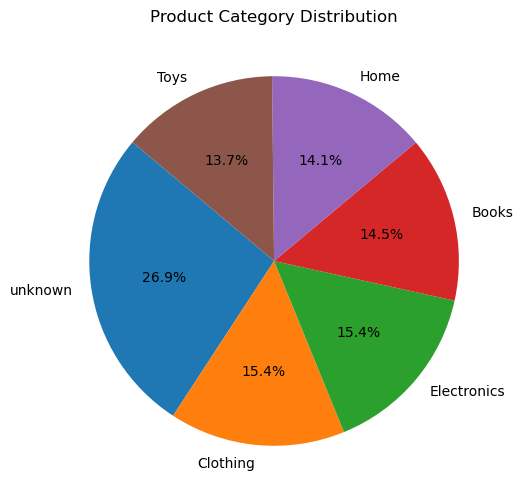

In [151]:
plt.figure(figsize=(10,6))
plt.pie(category,labels=category.index,autopct='%1.1f%%',startangle=140)# that make pie chart
plt.title('Product Category Distribution')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

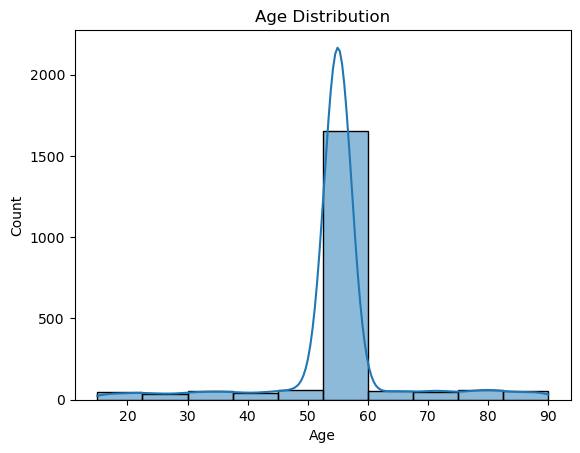

In [152]:
sns.histplot(data['Age'],bins=10,kde='true')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Age vs Product Category')

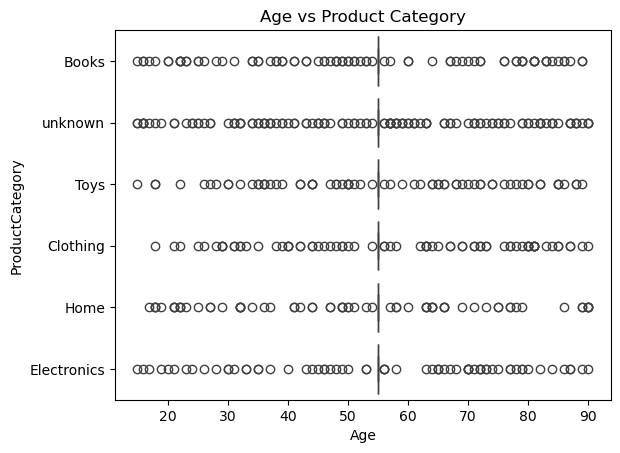

In [153]:
sns.boxplot(data=data,x='Age',y='ProductCategory')
plt.title('Age vs Product Category')

In [154]:
corr=data[['Age','PurchaseAmount','Rating']].corr()

<Axes: >

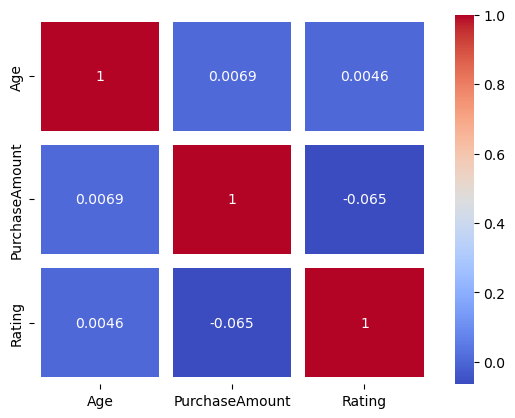

In [155]:
sns.heatmap(corr ,annot=True,linewidths=10,cmap='coolwarm')

Text(0.5, 1.0, 'Age vs Purchase Amount by Product Category')

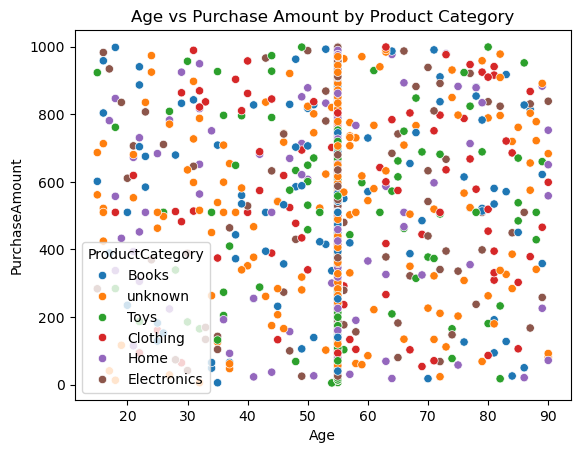

In [156]:
sns.scatterplot(data=data,x='Age',y='PurchaseAmount',hue='ProductCategory')
plt.title('Age vs Purchase Amount by Product Category') 

In [162]:
data.fillna({"PurchaseDate":"Not Avilable"},inplace=True)  # fill null values in PurchaseDate column with Not Avilable}

NOW the data is finished

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2100 non-null   object 
 1   Name             2100 non-null   object 
 2   Age              2100 non-null   int64  
 3   Email            2100 non-null   object 
 4   Phone            2100 non-null   object 
 5   PurchaseAmount   2100 non-null   float64
 6   PurchaseDate     2100 non-null   object 
 7   ProductCategory  2100 non-null   object 
 8   Rating           2100 non-null   float64
 9   PurachaseAmount  2100 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 180.5+ KB


In [164]:
data.to_csv(' finally_cleaned_customer_data.csv', index=False)